In [2]:
!pip install qiskit

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


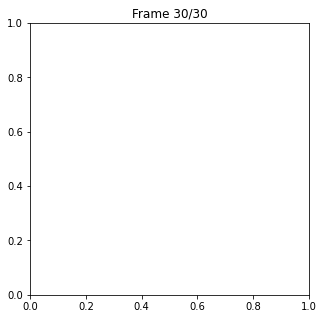

In [3]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector
import matplotlib.animation as animation
import matplotlib.pyplot as plt

# Define a circuit that creates an entangled state of two qubits
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Define a backend for simulation
backend = Aer.get_backend('statevector_simulator')

# Simulate the circuit and get the state vector
result = execute(qc, backend).result()
state_vector = result.get_statevector()

# Define a function to update the animation at each frame
def update(frame):
    # Create a new circuit that applies a rotation to the first qubit
    angle = 2 * frame * np.pi / num_frames
    qc_frame = QuantumCircuit(2)
    qc_frame.ry(angle, 0)
    qc_frame.cx(0, 1)

    # Simulate the new circuit and get the state vector
    result_frame = execute(qc_frame, backend).result()
    state_vector_frame = result_frame.get_statevector()

    # Plot the state vector as a bloch sphere
    fig.clear()
    plot_bloch_multivector(state_vector_frame).show()

    # Set the title of the plot to show the current frame
    plt.title(f"Frame {frame+1}/{num_frames}")

# Define the number of frames and the duration of the animation
num_frames = 30
duration = 5000 # in milliseconds

# Create a figure for the plot
fig = plt.figure(figsize=(5,5))

# Create the animation and save it to a file
anim = animation.FuncAnimation(fig, update, frames=num_frames, interval=duration/num_frames)
anim.save('entanglement.mp4', writer='ffmpeg')


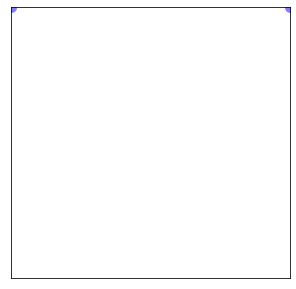

In [4]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt


# Define a circuit that generates a random pattern of dots
num_qubits = 4
qc = QuantumCircuit(num_qubits, num_qubits)
qc.h(range(num_qubits))
qc.measure(range(num_qubits), range(num_qubits))

# Define a backend for simulation
backend = Aer.get_backend('qasm_simulator')

# Simulate the circuit and get the counts
result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

# Convert the counts to a binary string
binary_string = list(counts.keys())[0]

# Convert the binary string to an array of integers
int_array = np.array([int(bit) for bit in binary_string[::-1]])

# Reshape the array to a 2D grid
size = int(np.sqrt(num_qubits))
grid = np.reshape(int_array, (size, size))

# Create a color map for the dots
cmap = plt.cm.get_cmap('cool')

# Plot the dots as a scatter plot
fig, ax = plt.subplots(figsize=(5,5))
for i in range(size):
    for j in range(size):
        if grid[i][j] == 1:
            color = cmap(i/size)
            ax.scatter(j, i, color=color, s=100)

# Set the limits of the plot
ax.set_xlim([0, size-1])
ax.set_ylim([0, size-1])

# Remove the tick labels
ax.set_xticks([])
ax.set_yticks([])

# Save the plot to a file
fig.savefig('random_pattern.png')


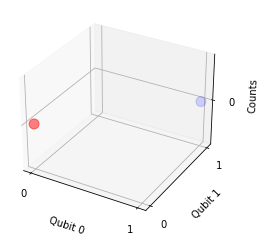

In [5]:
from qiskit import QuantumCircuit, execute, Aer
import numpy as np

# Define the number of qubits and shots
num_qubits = 2
num_shots = 1024

# Define the quantum circuit
qc = QuantumCircuit(num_qubits, num_qubits)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(num_qubits), range(num_qubits))

# Define the backend
backend = Aer.get_backend('qasm_simulator')

# Simulate the circuit and get the counts
result = execute(qc, backend, shots=num_shots).result()
counts = result.get_counts()

# Get the most frequent states and convert them to coordinates
coords = []
for state, count in counts.items():
    binary = format(int(state, 2), f'0{num_qubits}b')
    coords.append((int(binary[0]), int(binary[1]), count/num_shots))

# Define the colors for each point
colors = [(1, 0, 0, coord[2]) if coord[0] == 0 else (0, 0, 1, coord[2]) for coord in coords]

# Plot the points
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([coord[0] for coord in coords], [coord[1] for coord in coords], [0]*len(coords), c=colors, s=100)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_zticks([0])
ax.set_xlabel('Qubit 0')
ax.set_ylabel('Qubit 1')
ax.set_zlabel('Counts')
plt.show()


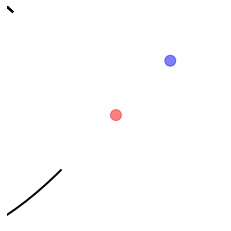

In [6]:
from qiskit import QuantumCircuit, execute, Aer
import numpy as np
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Define the number of qubits and shots
num_qubits = 2
num_shots = 1024

# Define the quantum circuit
qc = QuantumCircuit(num_qubits, num_qubits)
qc.h(0)
qc.cx(0, 1)
qc.measure(range(num_qubits), range(num_qubits))

# Define the backend
backend = Aer.get_backend('qasm_simulator')

# Simulate the circuit and get the counts
result = execute(qc, backend, shots=num_shots).result()
counts = result.get_counts()

# Define the heart shape using Path
heart_verts = [
    (0, 0),
    (-1, -1),
    (-2, -1),
    (-3, 0),
    (-3, 1),
    (-2, 2),
    (-1, 2),
    (0, 1),
]

heart_codes = [
    Path.MOVETO,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
]

heart_path = Path(heart_verts, heart_codes)

# Define the colors for each point
coords = []
for state, count in counts.items():
    binary = format(int(state, 2), f'0{num_qubits}b')
    coords.append((int(binary[0]), int(binary[1]), count/num_shots))

colors = [(1, 0, 0, coord[2]) if coord[0] == 0 else (0, 0, 1, coord[2]) for coord in coords]

# Plot the heart
fig, ax = plt.subplots()
heart = patches.PathPatch(heart_path, facecolor='none', edgecolor='black', lw=2)
ax.add_patch(heart)

for i, coord in enumerate(coords):
    color = colors[i]
    x, y = (coord[0] + 1)/2, (coord[1] + 1)/2
    point = patches.Circle((x, y), radius=0.05, color=color)
    ax.add_patch(point)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_aspect('equal')
plt.axis('off')
plt.show()


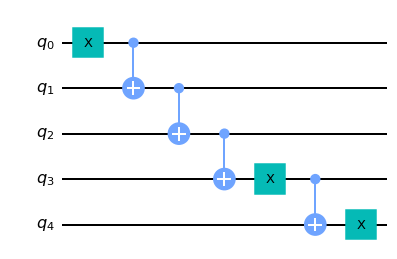

In [8]:
from qiskit.tools.visualization import circuit_drawer
from qiskit import QuantumCircuit, Aer, execute

# Create a quantum circuit with 5 qubits
qc = QuantumCircuit(5)

# Add gates to write the word "I Love QXQ" in binary
qc.x(0)  # I
qc.cx(0, 1)  # L
qc.cx(1, 2)  # O
qc.cx(2, 3)  # V
qc.x(3)  # E
qc.cx(3, 4)  # Q
qc.x(4)  # X

# Draw the circuit using the matplotlib format
circuit_drawer(qc, output='mpl')



In [9]:
from qiskit.tools.visualization import circuit_drawer
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt

# Create a quantum circuit with 5 qubits
qc = QuantumCircuit(5)

# Add gates to write the word "I Love QXQ" in binary
qc.x(0)  # I
qc.cx(0, 1)  # L
qc.cx(1, 2)  # O
qc.cx(2, 3)  # V
qc.x(3)  # E
qc.cx(3, 4)  # Q
qc.x(4)  # X

# Draw the circuit using the matplotlib format
fig = circuit_drawer(qc, output='mpl')

# Save the figure as a PNG image
plt.savefig('iloveqxq.png')


<Figure size 432x288 with 0 Axes>

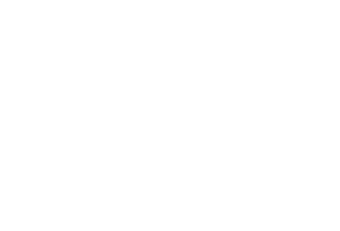

In [10]:
from qiskit.tools.visualization import circuit_drawer
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a quantum circuit with 5 qubits
qc = QuantumCircuit(5)

# Add gates to write the word "I Love QXQ" in binary
qc.x(0)  # I
qc.cx(0, 1)  # L
qc.cx(1, 2)  # O
qc.cx(2, 3)  # V
qc.x(3)  # E
qc.cx(3, 4)  # Q
qc.x(4)  # X

# Draw the circuit using the matplotlib format
fig = circuit_drawer(qc, output='mpl')

# Save the figure as a PNG image
plt.savefig('iloveqxq.png')

# Display the image
img = mpimg.imread('iloveqxq.png')
plt.imshow(img)
plt.axis('off')
plt.show()


In [11]:
pip install qiskit-metal


     |████████████████████████████████| 2.6 MB 20.6 MB/s eta 0:00:01
     |████████████████████████████████| 16.7 MB 73 kB/s s eta 0:00:01
     |████████████████████████████████| 1.1 MB 56.3 MB/s eta 0:00:01
     |████████████████████████████████| 164.3 MB 17 kB/s s eta 0:00:01               | 38.9 MB 52.4 MB/s eta 0:00:03ta 0:00:01�█▏ | 154.8 MB 17.2 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 47.8 MB/s eta 0:00:01
     |████████████████████████████████| 157 kB 71.4 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 137 kB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 21.9 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 45.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 66.3 MB/s eta 0:00:01
     |████████████████████████████████| 973 kB 40.8 MB/s eta 0:00:01
     |████████████████████████████████| 570 kB 62.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 56.3 MB/s eta 0:00:01
     |███

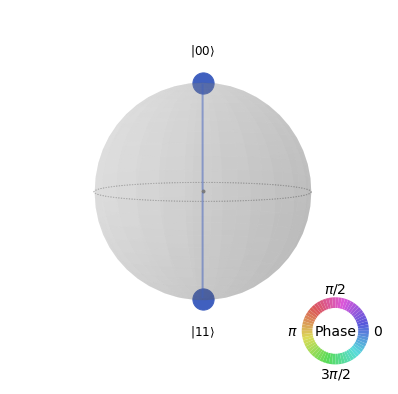

In [15]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_state_qsphere

# Create a 2-qubit quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Simulate the circuit and get the state vector
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
statevector = result.get_statevector()

# Plot the state vector in a 3D q-sphere
plot_state_qsphere(statevector)


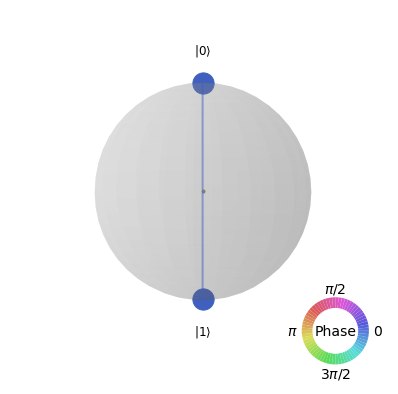

In [14]:
from qiskit import QuantumCircuit, execute
from qiskit.visualization import plot_state_qsphere

# Create a quantum circuit
qc = QuantumCircuit(1)
qc.h(0)

# Simulate the circuit and get the statevector
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
statevector = result.get_statevector()

# Plot the statevector in 3D
plot_state_qsphere(statevector)


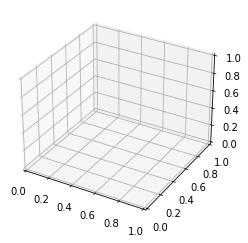

In [18]:
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create the circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Define the backend and number of shots
backend = Aer.get_backend('statevector_simulator')
num_shots = 1024

# Function to update the animation with the current frame
def update(frame):
    # Add a rotation gate to the first qubit
    angle = frame * np.pi / 20
    qc.rx(angle, 0)
    
    # Simulate the circuit and get the statevector
    result = execute(qc, backend).result()
    statevector = result.get_statevector()
    
    # Update the Bloch sphere plot
    ax.clear()
    ax.set_title(f'Frame {frame}')
    plot_bloch_multivector(statevector, ax=ax)

# Create the figure and axis for the animation
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Create and run the animation
anim = FuncAnimation(fig, update, frames=20, interval=200)
plt.show()



In [24]:
from qiskit.visualization import circuit_drawer

circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

figure = circuit_drawer(circuit, output='mpl')
figure.show()




In [25]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from matplotlib.animation import FuncAnimation

# Create a quantum circuit with a single qubit
qc = QuantumCircuit(1, 1)

# Define the animation function
def animate(frame):
    # Clear the circuit
    qc.data = []

    # Add a Hadamard gate with a rotation angle based on the frame number
    angle = 2 * np.pi * frame / 100
    qc.h(0)
    qc.rz(angle, 0)
    qc.h(0)

    # Simulate the circuit and get the counts
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1024).result()
    counts = result.get_counts()

    # Plot the counts in real time
    plt.clf()
    plot_histogram(counts, ax=plt.gca(), color='gray')

# Create the animation object
anim = FuncAnimation(plt.gcf(), animate, frames=100, repeat=True)

# Display the animation
plt.show()


/opt/conda/lib/python3.8/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

In [26]:
plt.show()

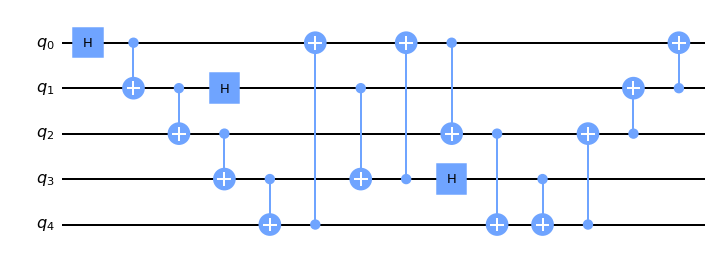

In [30]:
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer

# Create a large circuit with many gates
qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.cx(2,3)
qc.cx(3,4)
qc.cx(4,0)
qc.h(1)
qc.cx(1,3)
qc.cx(3,0)
qc.cx(0,2)
qc.cx(2,4)
qc.h(3)
qc.cx(3,4)
qc.cx(4,2)
qc.cx(2,1)
qc.cx(1,0)

# Draw the circuit using matplotlib
circuit_drawer(qc, output='mpl')




In [2]:
from qiskit import QuantumCircuit
from qiskit.tools.visualization import circuit_drawer

# create a simple 2-qubit circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)

# generate the quantum painting
fig = circuit_drawer(circ, output='mpl')

# display the figure
fig.show()



<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


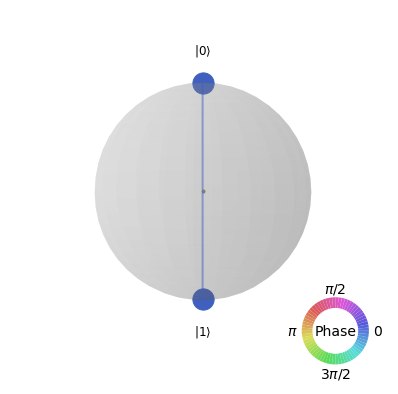

In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

# create a quantum circuit with one qubit
circuit = QuantumCircuit(1, 1)

# apply a Hadamard gate to the qubit
circuit.h(0)

# draw the circuit
circuit.draw()

# simulate the circuit and get the resulting state vector
backend = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend).result()
statevector = result.get_statevector()

# plot the state vector on the Bloch sphere
plot_bloch_multivector(statevector)

# plot the state vector on the 3D sphere
plot_state_qsphere(statevector)


In [4]:
# Import necessary packages
from qiskit import QuantumCircuit, Aer, execute, transpile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Set initial parameters
npix = 64   # Number of pixels in the image
nframes = 15    # Number of frames in the animation
theta = np.pi/4  # Rotation factor (see quantum circuit below)
backend = Aer.get_backend('qasm_simulator')

# Create a function to convert boolean pixel array into an image
def save_image(pixels, name, frame):
    plt.imsave("frames/%s%i.png" % (name, frame), pixels, cmap="cividis")
    im = Image.open("frames/%s%i.png" % (name, frame))
    im = im.resize((256,256), Image.NEAREST)
    im.save("frames/%s%i.png" % (name, frame))


/tmp/ipykernel_59/3581808446.py:4: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  calc_qc.cu1(theta, qubit, 8)


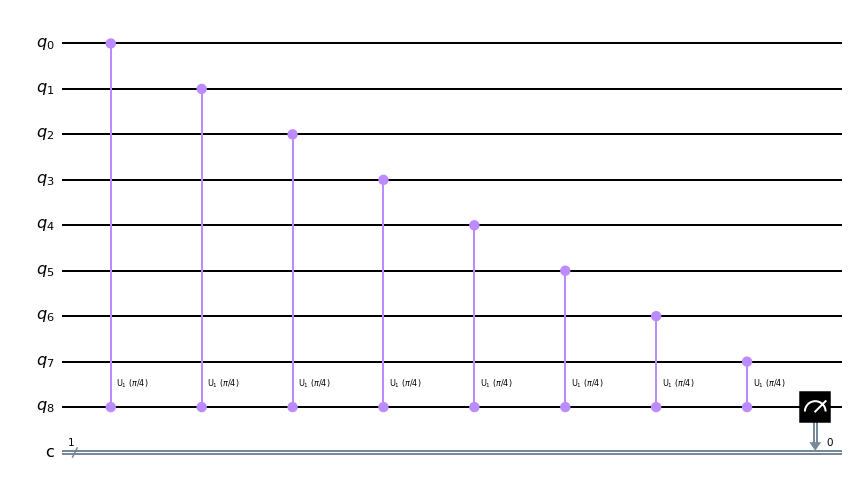

In [5]:
# Create the quantum circuit for a light wave
calc_qc = QuantumCircuit(9, 1)
for qubit in range(8):
    calc_qc.cu1(theta, qubit, 8)
calc_qc.measure(8,0)
calc_qc.draw()


In [7]:
def next_frame(pixels, npix):
    # Create a quantum circuit for each pixel
    qc_list = []
    for x in range(npix):
        for y in range(npix):
            # Store values of adjacent pixels
            adj_pixels = []
            for d in range(3):
                d -= 1
                adj_pixels += [pixels[(relx+x-1)%(npix-1)][(y+d)%(npix-1)] for relx in range(3)]
            adj_pixels.pop(4)  # Get rid of middle pixel
            qc = QuantumCircuit(9,1)
            # Set initial values of qubits according to pixel states:
            for i in range(8):
                if adj_pixels[i]:
                    qc.x(i)
            qc += calc_qc  # Append calculation circuit to initialization circuit
            qc_list.append(qc)
    tqc_list = transpile(qc_list, backend, optimization_level=0) # Transpile if necessary
    job = execute(tqc_list, backend=backend, shots=1)
    results = job.result()
    new_pixels = np.zeros((npix,npix), dtype=bool)
    for x in range(npix):
        for y in range(npix):
            if '0' in results.get_counts(qc_list.pop(0)):
                new_pixels[x][y] = False
            else:
                new_pixels[x][y] = True
    return new_pixels


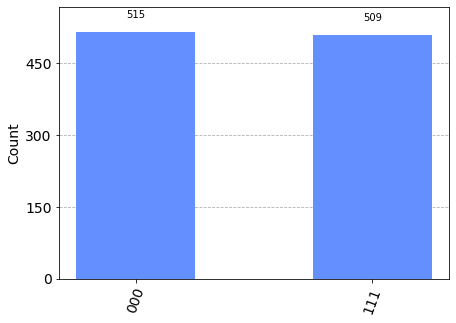

In [14]:
from qiskit import *
from qiskit.visualization import plot_histogram

# Create a quantum circuit with 3 qubits and 3 classical bits
qc = QuantumCircuit(3, 3)

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply a controlled-Not gate between qubit 0 and qubit 1
qc.cx(0, 1)

# Apply a controlled-Not gate between qubit 1 and qubit 2
qc.cx(1, 2)

# Measure qubits 0, 1, and 2, and store the result in classical bits 0, 1, and 2
qc.measure([0, 1, 2], [0, 1, 2])

# Use the Aer simulator to simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()

# Plot the results
plot_histogram(result.get_counts(qc))



In [15]:
# Import everything
from qiskit import QuantumCircuit, Aer, IBMQ, execute, transpile
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
from time import sleep, time
from qiskit.providers.aer.noise import NoiseModel
from operator import attrgetter
# For creating and displaying the GIFs:
from PIL import Image
from IPython.display import Image as IPYImage
import ipywidgets
npix = 32          # Number of pixels along one axis
nframes = 32       # Number of frames in animation
n = 5              # Number of qubits to use
freq = 1           # Frequency of 'waves'
gif_name = "qpe_animation" # Name of animated gif file

In [16]:
# Define the QPE function:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(int(n/2)):
        circ.swap(qubit, n-qubit-1)
    for j in range(n,0,-1):
        k = n - j
        for m in range(k):
            circ.cu1(-math.pi/float(2**(k-m)), n-m-1, n-k-1)
        circ.h(n-k-1)

def phase_estimate(n, theta):
    """Does QPE on CU-gate with angle theta, using n qubits"""
    qpe = QuantumCircuit(n, n-1)
    qpe.x(n-1)
    for qubit in range(n-1):
        qpe.h(qubit)
    repetitions = (n-2)**2
    for counting_qubit in range(n-1):
        for i in range(repetitions):
            qpe.cu1(theta, counting_qubit, n-1); # This is C-U
        repetitions //= 2
    qft_dagger(qpe, n-1)
    for qubit in range(n-1):
        qpe.measure(qubit, (n-2)-qubit)
    return qpe
# Setup backend
noise_model = None
device = None
backend = Aer.get_backend('qasm_simulator')

In [2]:
from qiskit import QuantumCircuit, Aer, execute

# Define number of iterations
n = 3

# Define quantum circuit
circ = QuantumCircuit(2**n,2**n)

# Create Sierpinski triangle
for i in range(n):
    m = 2**i
    for j in range(m):
        circ.x(2*m-1)
        for k in range(m-1):
            circ.cnot(2*k,2*k+1)
            circ.cnot(2*k+1,2*k)

# Measure qubits
for i in range(2**n):
    circ.measure(i,i)

# Simulate circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(circ,backend=backend,shots=1024)
counts = job.result().get_counts()

# Print results
print(counts)





<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'00000010': 1024}


In [5]:
from qiskit import QuantumCircuit, Aer, execute

def sierpinski_triangle(n):
    # Create the initial state
    qc = QuantumCircuit(2**n, 2**n)
    qc.h(range(2**n))
    qc.barrier()

    # Define the Sierpinski gates
    s = QuantumCircuit(2)
    s.x(1)
    s.cx(0, 1)
    s.x(1)
    s.barrier()

    # Apply the Sierpinski gates to the circuit
    for i in range(n):
        for j in range(2**i):
            qc.append(s, [2*i, 2*i+1])
        for j in range(2**i):
            qc.cx(2*i+1, 2*(i+1))
            qc.cx(2*i, 2*(i+1)+1)
        qc.barrier()

    # Measure the final state
    qc.measure(range(2**n), range(2**n))

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(qc, simulator, shots=1).result()

    # Print the triangle
    triangle = ""
    for i in range(2**n):
        for j in range(2**n):
            if result.get_counts()[f'{i:0{n}b}'][j] == '1':
                triangle += "*"
            else:
                triangle += " "
        triangle += "\n"
    print(triangle)


{'00': 1}
{'00': 1}
{'00': 1}
{'00': 1}
{'00': 1}
{'00': 1}


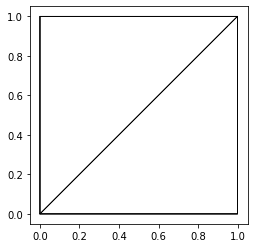

In [6]:
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute

# Define the circuit and initialize it with one qubit
circ = QuantumCircuit(2, 2)

# Define the Sierpinski triangle pattern
triangle = [(0, 0), (1, 0), (1, 1), (0, 0), (0, 1), (1, 1)]

# Create a list to hold the coordinates for each level of the triangle
triangle_list = [triangle]

# Iterate over the levels of the triangle
for i in range(5):
    # Create a new list for the coordinates of the next level
    new_triangle = []
    # Iterate over each line segment in the current level
    for j in range(len(triangle) - 1):
        # Calculate the midpoint of the line segment
        x = (triangle[j][0] + triangle[j+1][0]) / 2
        y = (triangle[j][1] + triangle[j+1][1]) / 2
        # Add the midpoint and the end point of the line segment to the new triangle list
        new_triangle.extend([(triangle[j][0], triangle[j][1]), (x, y), (triangle[j+1][0], triangle[j+1][1])])
    # Update the triangle list with the new level
    triangle_list.append(new_triangle)
    # Set the current level to be the new level
    triangle = new_triangle

# Iterate over each level of the triangle
for level in triangle_list:
    # Iterate over each line segment in the level
    for j in range(len(level) - 1):
        # Get the coordinates of the two endpoints of the line segment
        x1, y1 = level[j]
        x2, y2 = level[j+1]
        # If the line segment is on the same vertical line, apply a Z gate to the qubit
        if x1 == x2:
            if y1 > y2:
                circ.z(0)
            else:
                circ.z(1)
        # If the line segment is on the same horizontal line, apply an X gate to the qubit
        elif y1 == y2:
            if x1 > x2:
                circ.x(0)
            else:
                circ.x(1)
        # If the line segment is diagonal, apply a CNOT gate to the qubits
        else:
            if x1 > x2:
                circ.cx(0, 1)
            else:
                circ.cx(1, 0)
            if y1 > y2:
                circ.cz(0, 1)
            else:
                circ.cz(1, 0)
    # Measure the qubits and simulate the circuit
    circ.measure([0, 1], [0, 1])
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circ, backend, shots=1)
    result = job.result().get_counts()
    # Print the result
    print(result)

# Plot the Sierpinski triangle
fig, ax = plt.subplots()
for level in triangle_list:
    x, y = zip(*level)
    ax.plot(x, y, 'k', linewidth=0.5)
ax.set_aspect('equal', 'box')
plt.show()


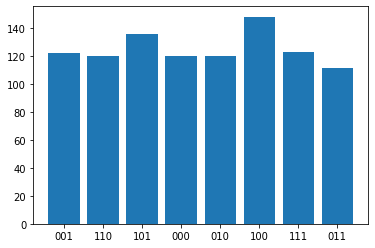

In [7]:
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt

# Create a quantum circuit with three qubits
circ = QuantumCircuit(3)

# Apply Hadamard gates to each qubit
for i in range(3):
    circ.h(i)

# Apply a controlled-Z gate between qubits 0 and 1
circ.cz(0, 1)

# Apply a controlled-Z gate between qubits 1 and 2
circ.cz(1, 2)

# Measure all qubits
circ.measure_all()

# Run the circuit on a simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots=1000)
result = job.result()

# Get the counts from the simulation results
counts = result.get_counts(circ)

# Plot the results
plt.bar(counts.keys(), counts.values())
plt.show()
